In [1]:
import pandas as pd
import seaborn as sns
import os
import sys
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
import project_functions
url='https://raw.githubusercontent.com/data301-2020-winter2/course-project-group_1017/main/Data/Raw/medical_expenses.csv'

Our original data set is given below

In [2]:
dfo=pd.read_csv(url)
dfo

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


This data set is describing expected medical costs in America based on other variables, it is from Machine Learning with R by Brett Lantz. This dataset is pretty clean but I will do some wrangling to it so it can be better used for analysis. From this dataset I would like to be able to answer how unhealthy life styles such as under or over average bmi and smoking effect medical charges of an individual and to what extent these factors play a roll in expected charges of an individual 

**Data Wrangling**
---

---

First I would like to add some columns to this dataset and change some of the variable names to better suit the variable it is representing

In [3]:
df=project_functions.load_and_process(url)
df

,age,sex,bmi,smoker,charges,Excess_charges,Over_BMI,Under_BMI,Healthy
0,18,male,23.2,no,1121.87,No,No,No,yes
1,18,male,30.1,no,1131.51,No,Yes,No,no
2,18,male,33.3,no,1135.94,No,Yes,No,no
3,18,male,33.7,no,1136.40,No,Yes,No,no
4,18,male,34.1,no,1137.01,No,Yes,No,no
...,...,...,...,...,...,...,...,...,...
1333,33,female,35.5,yes,55135.40,Yes,Yes,No,no
1334,31,female,38.1,yes,58571.07,Yes,Yes,No,no
1335,52,male,34.5,yes,60021.40,Yes,Yes,No,no
1336,45,male,30.4,yes,62592.87,Yes,Yes,No,no


Here i dropped the children and the region column as they wont be used in further analysis so they are redundant and I rounded the bmi amd charges to values that are more commonly used.

In [4]:
project_functions.mean(df)

13270.42

Taking a mean of the charges column returns a value of 13270.42 which we used to determine if the patient is given excessive charges which means they pay out more than expected on average. Next i want to seperate the data sets into healthy and not healthy populations to see how excessive charges changes throughout the population

In [5]:
dfh = project_functions.Health(url)
dfun =project_functions.unHealth(url)

In [6]:
dfh

,age,sex,bmi,smoker,charges,Excess_charges,Healthy
0,18,male,23.2,no,1121.87,No,yes
1,19,male,19.8,no,1241.56,No,yes
2,19,male,20.3,no,1242.26,No,yes
3,19,male,20.7,no,1242.82,No,yes
4,21,male,23.2,no,1515.34,No,yes
...,...,...,...,...,...,...,...
167,24,female,23.2,no,25081.77,Yes,yes
168,47,female,24.1,no,26236.58,Yes,yes
169,52,female,24.9,no,27117.99,Yes,yes
170,34,male,22.4,no,27375.90,Yes,yes


Here is the data set for healthy people, the requirements for this was to be in healthy bmi range of 18.5-24.9 and to not be a smoker.

In [7]:
dfun

,age,sex,bmi,smoker,charges,Excess_charges,Healthy
0,18,male,30.1,no,1131.51,No,no
1,18,male,33.3,no,1135.94,No,no
2,18,male,33.7,no,1136.40,No,no
3,18,male,34.1,no,1137.01,No,no
4,18,male,34.4,no,1137.47,No,no
...,...,...,...,...,...,...,...
1161,33,female,35.5,yes,55135.40,Yes,no
1162,31,female,38.1,yes,58571.07,Yes,no
1163,52,male,34.5,yes,60021.40,Yes,no
1164,45,male,30.4,yes,62592.87,Yes,no


Here is the data set for unhealthy people the requirments are the inverse of the healthy data set thus they have to be outside the healthy bmi range or be classified as a smoker. We can first look at some regression plots of age vs charges to see how having a unhealthy lifestyle effects the charges

**Regression Plots**
---

---

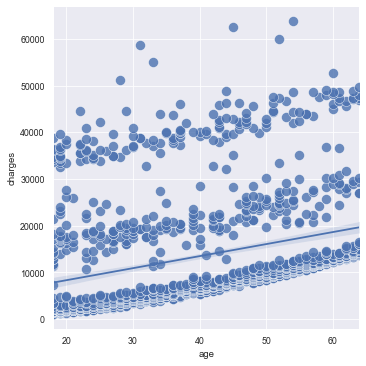

In [8]:
project_functions.plotAvC(df)

Regression plot for whole population

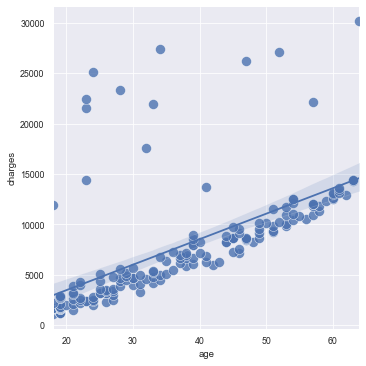

In [9]:
project_functions.plotAvC(dfh)

Regression plot for healthy indivduals

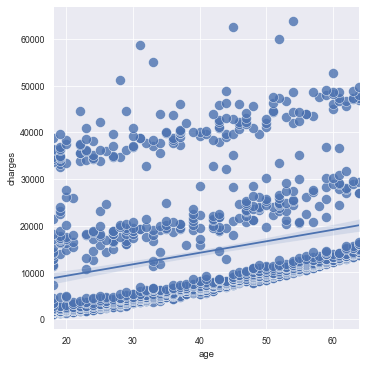

In [10]:
project_functions.plotAvC(dfun)

Regression plot for unhelathy individuals

from a quick look we can clearly tell from the regression line that having a unhealthy habit leads to on average a higher charge at each age with only the outliers of the healthy individuals coming close to the average of the unhealthy ones.This is fairly ordinary as more unhealthy habits require more health check uos etc.However on closer inspection we see that in this unhealthy group there is a lot of spread of data points with there looking like there is actually 3 populations in this dataset, this makes sense as the requirement of this dataset was to be smoker OR outside the healthy bmi range which results in 3 different datsets more on that later.

For now we can look at how more likely a indiviudal is to have excess charges if they have a unhealthy trait with frequency ar counts.

**Bar plots**
---

---

<AxesSubplot:xlabel='Excess_charges', ylabel='Density'>

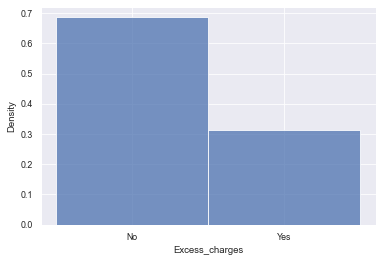

In [11]:
project_functions.BrPltECD(df)

Bar plot for whole population

<AxesSubplot:xlabel='Excess_charges', ylabel='Density'>

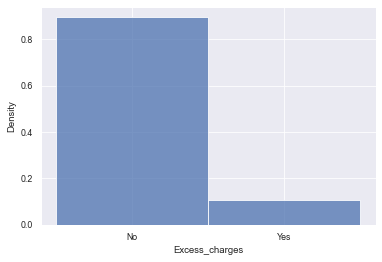

In [12]:
project_functions.BrPltECD(dfh)

frequency count of if an indivdual is to recieve excess charges in healthy population

<AxesSubplot:xlabel='Excess_charges', ylabel='Density'>

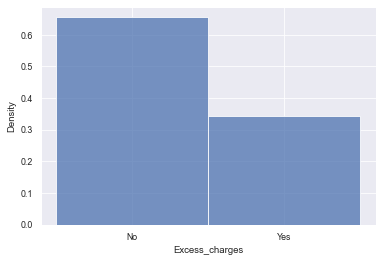

In [13]:
project_functions.BrPltECD(dfun)

frequency count of if an indivdual is to recieve excess charges in unhealthy population

This further reinforces that a unhealthly life choice leads to a higher chance of an individual receiving a higher than average medical bill charge. We saw that there was outliers on the regression plots and we also couldnt see how much the data was spread for the healthy and unhealthy groups to better visualise this we can use box plots

**Box plots**
---

---

<AxesSubplot:xlabel='Healthy', ylabel='charges'>

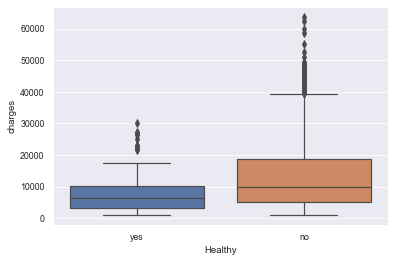

In [14]:
project_functions.BoxPlt(df)

This further shows us the spread of the unhealthy charges this is due to their being multiple distrubutions collected in there but from the analysis of healthy vs unhealthy it further shows how much less the people with a healthy life style pay less charges. We can draw many conclusions just from this graph, we can see that 75% of the healthy population pay less than 10,000 whilst only 50% of the unhealthy population pays below this figure.

**different Unhealthy categories**
---

---

We mentioned earlier how in the unhelathy regression plot there seemed to be 3 different distributions now lets look at these in further depth and how they effect the charges, the 3 categories for this are under bmi,over bmi and smokers. First lets create data frames for each of these categories with only one variable per person

In [15]:
dfs=project_functions.smoker(url)
dfs

,age,sex,bmi,smoker,charges,Excess_charges
0,18,male,21.6,yes,13747.87,Yes
1,19,female,21.7,yes,13844.51,Yes
2,18,female,21.7,yes,14283.46,Yes
3,24,female,20.5,yes,14571.89,Yes
4,20,female,22.4,yes,14711.74,Yes
5,21,female,21.8,yes,15359.10,Yes
6,25,male,24.1,yes,15817.99,Yes
7,38,male,19.3,yes,15820.70,Yes
8,29,female,21.8,yes,16115.30,Yes
9,29,male,22.9,yes,16138.76,Yes


Data frame for smokers only

In [16]:
dfob=project_functions.overBmi(url)
dfob

,age,sex,bmi,smoker,charges,Excess_charges
0,18,male,30.1,no,1131.51,No
1,18,male,33.3,no,1135.94,No
2,18,male,33.7,no,1136.40,No
3,18,male,34.1,no,1137.01,No
4,18,male,34.4,no,1137.47,No
...,...,...,...,...,...,...
872,44,male,29.7,no,32108.66,Yes
873,52,female,37.5,no,33471.97,Yes
874,55,female,26.8,no,35160.13,Yes
875,61,female,33.3,no,36580.28,Yes


Data frame for over average bmi

In [17]:
dfub=project_functions.underBmi(url)
dfub

,age,sex,bmi,smoker,charges,Excess_charges
0,19,male,17.5,no,1621.34,No
1,18,male,16.0,no,1694.80,No
2,19,female,17.8,no,1727.78,No
3,21,female,17.4,no,2585.27,No
4,26,male,17.7,no,2680.95,No
5,23,male,17.4,no,2775.19,No
6,21,female,16.8,no,3167.46,No
7,28,female,17.3,no,3732.63,No
8,35,male,17.9,no,5116.50,No
9,38,male,16.8,no,6640.54,No


Dataframe for under average bmi

**Regression Plots**
---

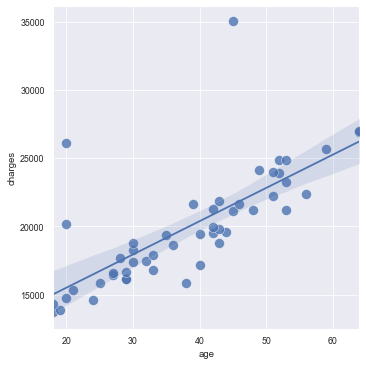

In [18]:
project_functions.plotAvC(dfs)

Regression plot for smokers only

We see here that the smokers at the least pay around 14,000 this is larger than the average charge for all patients, this suggests that the leading factor in large charges is smoking

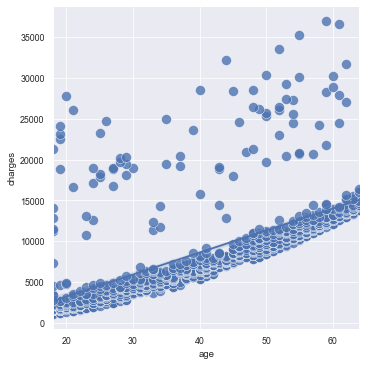

In [19]:
project_functions.plotAvC(dfob)

Regression plot for over weight people

Here is where we see the majority of our population and this looks very similar to the regression plot of healthy individuals with a similar frequency of outliers above the regression line to the healthy case this points towards elimination of over average bmi from being a leading factor in above average charges.

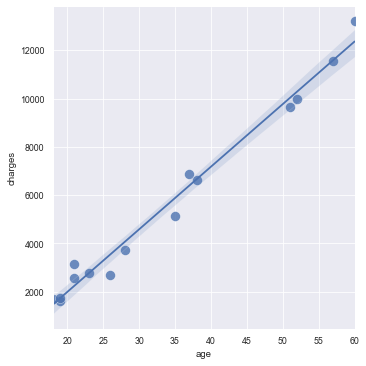

In [20]:
project_functions.plotAvC(dfub)

Regression plot for underweight people only

This regression plot actually shows a under average bmi leads towards a much lower charge per age as the lowest charge is around 2000 whilst the maxium is only around 13,000, however this is a very small population compared to the other cases of only 14 so we cannot say this is for certain but thsi evidence combined with the over average bmi helps eliminate bmi being a leading cause in excess medical charges

These regression plots mostly show that the smokers have a large variety in the charges at each age and that bmi actually does not have too much of effect on the charges at each age and that a lower bmi actually looks like it causes a lower charge at each age group.

**Bar Plots**
---

---

<AxesSubplot:xlabel='Excess_charges', ylabel='Density'>

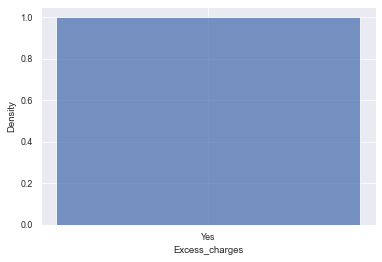

In [21]:
project_functions.BrPltECD(dfs)

Bar plot for smokers only

This further shows that smoking is a leading factor in excess medical charges as from a respectiable sample size we've shown that everyone who smokes will have excess charges.

<AxesSubplot:xlabel='Excess_charges', ylabel='Density'>

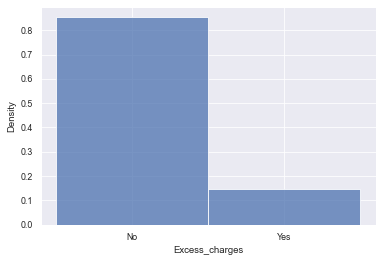

In [22]:
project_functions.BrPltECD(dfob)

Bar plot for over weight people only

Here we see that over weight people are more likely to have excess charges as compared to healthy people as they appear to be charged excess charges around 0.15 where as healthy people around around 0.1. This shows that having a over average bmi leads towards a higher chance of being charged more than average costs this is further backed up as this population was quite large so it can be used to draw a better conclusion, there was some outliers but we can compare those with bar plots later.

<AxesSubplot:xlabel='Excess_charges', ylabel='Density'>

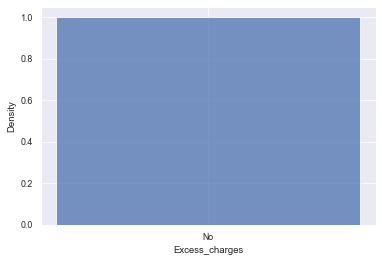

In [23]:
project_functions.BrPltECD(dfub)

Bar plot for under weight people only

Here we see something interesting in that under weight people only get charged under the average charges. This is interesting but could be down to the small sample size of this population because of this i wont draw a conclusion that a lower bmi leads to lower medical fees but it can be used to rule it out in a leading factor for higher fees.

**Box Plots**
---

---

<AxesSubplot:xlabel='Over_BMI', ylabel='charges'>

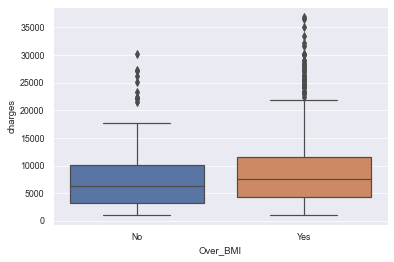

In [24]:
project_functions.BoxPltob(df)

Box plot of not over weight vs over weight

Here we can see the over bmi population has a similar spread copared to healthy bmi but the over bmi is shifted upwards by a slight amount, we also see the over bmi has more outliers but this is expected due to a larger population size. This larger population size for over bmi could be due to the increasing obesity crisis in America thus more people are likely to be overweight as this is more normal this could be the reason that the frequency wasnt much higher for this group as its more likely to shift the mean of the dataset. So the higher frequency of excess charges and the more outliers in this case point towards the over bmi population having a larger medical charge on average as the outliers skew the mean thus it isnt a true representation of the mean which would need more investitgation.

<AxesSubplot:xlabel='Under_BMI', ylabel='charges'>

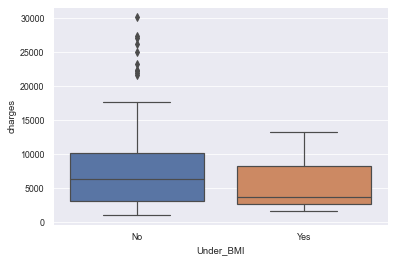

In [25]:
project_functions.BoxPltub(df)

Box plot of not under weight vs under weight

Again we see that the average costs for under bmi is lower and the spread of the data seemes to be the same as the healthy case, there are no outliers in this under bmi population so the mean is more representative of the population.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

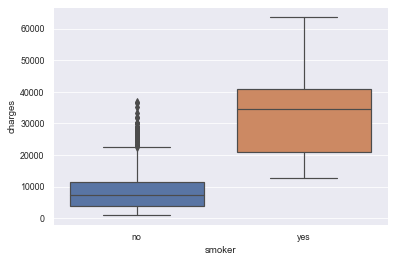

In [26]:
project_functions.BoxPlts(df)

Box plot of non smokers vs smokers

The smoker population spread is clearly much larger and higher than the healthy population, we also see no outliers in this case so this spread is a good representation of the whole smoker population. It's obvious looking at this and the previous examples that smoking is the dominate factor in higher medical fees

From the previous plots we saw that bmi doesnt have too much of an influence in charges, and in fact a lower bmi looked to cause lower fees but the population was too small to draw concrete conclusions from, but in the over bmi case we could look at the higher bmi which would be closer to the obese cases and would look at more extreme cases from the average population. From this we also saw that smoking was the dominant factor for the higher fees which we will investigate some more.

**Smokers**
---

---

We saw from the previous analysis that isolating only idividuals who only smoked showed a trend of excessive medical charges now I want to look at how people who smoke and have different bmi differ with their medical charges

In [27]:
dfas=project_functions.allsmoker(url)
dfas

,age,sex,bmi,smoker,charges,Excess_charges
0,18,male,17.3,yes,12829.46,No
1,18,male,21.6,yes,13747.87,Yes
2,19,female,21.7,yes,13844.51,Yes
3,18,female,21.7,yes,14283.46,Yes
4,26,female,17.2,yes,14455.64,Yes
...,...,...,...,...,...,...
269,33,female,35.5,yes,55135.40,Yes
270,31,female,38.1,yes,58571.07,Yes
271,52,male,34.5,yes,60021.40,Yes
272,45,male,30.4,yes,62592.87,Yes


**Regression Plots**
---

---

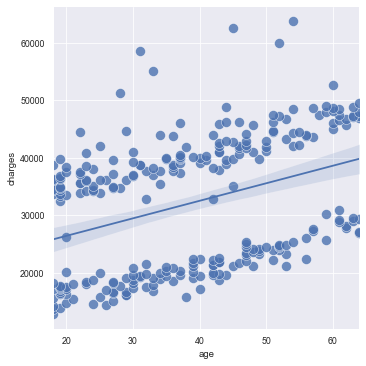

In [28]:
project_functions.plotAvC(dfas)

**Bar Plots**
---

---

<AxesSubplot:xlabel='Excess_charges', ylabel='Density'>

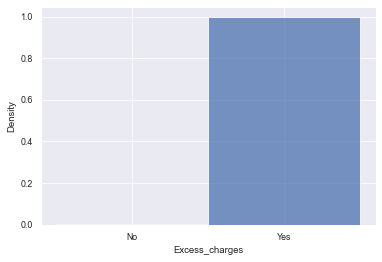

In [29]:
project_functions.BrPltECD(dfas)

**Box Plot**
---

<AxesSubplot:xlabel='smoker', ylabel='charges'>

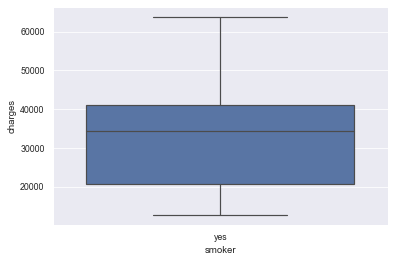

In [30]:
project_functions.BoxPlts(dfas)

Looking at these  plots its clear to see that even when we extend the smokers case to all the people that do smoke that excess charges is always common between the population. Now we have a larger population we can draw a more concrete conclusion, the regression plot shows us that most of the above average charges are associated with smokers this is further backed up by the bar plot which shows almost all of the population of smokers have above average charges, the final nail for the argument that smoking is the leading factor in higher than average charges is the box plot which shows no outliers and the smallest fee being only just below the excessive charges threshold.

**Obese**
---

---

Now i want to look at how extreme obeseity effects the charges, this is classified as a value of 40 or higher

In [31]:
dfobs=project_functions.obese(url)
dfobs

,age,sex,bmi,smoker,charges,Excess_charges,Over_BMI
0,18,male,41.1,no,1146.80,No,Yes
1,18,male,43.0,no,1149.40,No,Yes
2,18,male,53.1,no,1163.46,No,Yes
3,18,female,40.3,no,1634.57,No,Yes
4,19,female,40.5,no,1759.34,No,Yes
...,...,...,...,...,...,...,...
65,63,male,41.3,no,15555.19,Yes,Yes
66,25,female,41.3,no,17878.90,Yes,Yes
67,57,male,40.3,no,20709.02,Yes,Yes
68,58,female,41.9,no,24227.34,Yes,Yes


**Regression Plots**
---

---

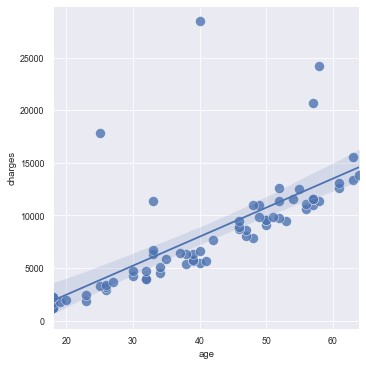

In [32]:
project_functions.plotAvC(dfobs)

**Bar plots**
---

---

<AxesSubplot:xlabel='Excess_charges', ylabel='Density'>

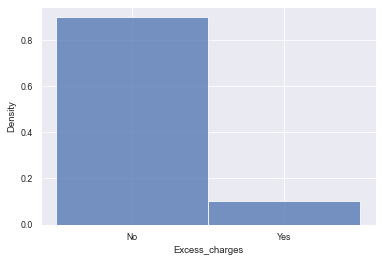

In [33]:
project_functions.BrPltECD(dfobs)

**Box plots**
---

<AxesSubplot:xlabel='Over_BMI', ylabel='charges'>

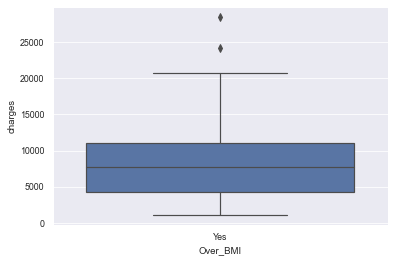

In [34]:
project_functions.BoxPltob(dfobs)

This is quite suprising in that the extrme case of obesity shows to  have similar distributions to the healthy population with the frequency plot and box being almost similar and the regression plot showing nothing out of the ordinary for our other plots.This shows that even extreme obesity doesnt effect medical charges to a large degree, this is suprising as I thought this would of had a substancial impact on charges.

All of this taken into acount we can say with confidence that the leading factor in excessive charges is smoking and not bmi of an individual.